## Importing the library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the data

In [3]:
data = pd.read_csv('Data/car-sales-extended-missing-data.csv')
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [4]:
data.isnull().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

<AxesSubplot:>

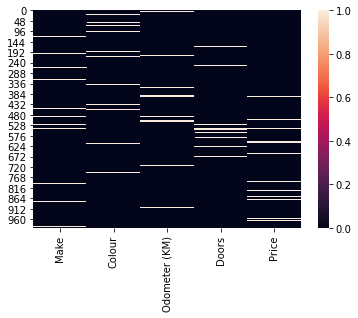

In [5]:
sns.heatmap(data.isnull())

## Fill Missing data


In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Drop rows with missing labels
data.dropna(subset=["Price"],inplace=True)

#Define different features and transformer pipeline
categorical_features = ["Make","Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy='constant',fill_value="missing")),
    ("onehot",OneHotEncoder(handle_unknown="ignore"))
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy='constant',fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean',))
])

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


# Import Random forest

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


### Settup preprocessing step(fill missing values,then convert to numbers)

In [8]:
preprocessor = ColumnTransformer(transformers = [("cat",categorical_transformer,categorical_features),
                                                ("door",door_transformer,door_feature),
                                                ("num",numeric_transformer,numeric_features)
                                                ])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor",preprocessor),
                       ("model",RandomForestRegressor())])

#Split data
X = data.drop("Price",axis=1)
y = data["Price"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Fit and Score the model
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Make', 'Colour']),
                                                 ('door',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=4,
                                                                                 strategy='constant'))]),
                              

In [9]:
model.score(X_test,y_test)

0.0833059092708347

#### It is possible to use `GridSearchCv` or `RandomSearchCV` with our `Pipeline`

In [10]:
## use grid search cv with our regression pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy":["mean","median"],
    "model__n_estimators":[100,1000],
    "model__max_depth":[None,5],
    "model__max_features":["auto"],
    "model__min_samples_split":[2,4],
}

gs_model = GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.7min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [13]:
gs_model.score(X_test,y_test)

0.26676006221584403

In [ ]:
! git add Putting_all_together.ipynb
! git commit -m "22:08/09-07-2021"
! git push origin main